# 7CCMFM18 Machine Learning
King's College London <br>
Academic year 2022-2023 <br>
Lecturer: Mario Martone

## solution for Problem 11

We will now follow good coding practices and first import all the libraries that we need:

In [118]:
import numpy as np
from scipy.stats import bernoulli
import tensorflow.keras as keras
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

Now let's sample two indetically distributions:

In [138]:
N=1000000

X1=np.random.uniform(-1,1,N)
X2=np.random.uniform(-1,1,N)

Xvec=np.vstack((X1, X2)).T

Next define our probability function and sample Y using the Bernoulli distribution associated to p:

In [139]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def p(x_vec):
    return sigmoid(3*np.sin(10*np.sqrt(x_vec[0]**2+x_vec[1]**2)))

Y=[]
for pair in Xvec:
    Y.append(bernoulli.rvs(p(pair)))
    
Y=np.array(Y)
Y=Y.reshape(N,1)

Let's check that our arrays have the correct shape:

In [140]:
print(Xvec.shape)
print(Y.shape)

(1000000, 2)
(1000000, 1)


Now we specify our neural network $\widehat{g}$ with which we intend to produce Y given inputs X1 and X2 the datapoints plotted above (and ultimately approximate the function $g$)
\begin{equation*}
\widehat{g} \in \mathcal{N}_4(2,200,200,200,1; \mathrm{ReLU},\mathrm{ReLU},\mathrm{ReLU},\sigma)
\end{equation*}
using the Sequential model of Keras, and inspect the specification.

In [141]:
g_hat = keras.Sequential([
    keras.layers.Dense(200, activation="relu", input_shape=(2,)),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
g_hat.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 200)               600       
                                                                 
 dense_65 (Dense)            (None, 200)               40200     
                                                                 
 dense_66 (Dense)            (None, 200)               40200     
                                                                 
 dense_67 (Dense)            (None, 1)                 201       
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


And now let's move to training choosing adam as an optimiser and the binary cross entropy loss function as a loss. We will train the network for 5 epochs and choose half of the training set as a validation set to track overfitting.

In [142]:
g_hat.compile(optimizer="adam", loss="binary_crossentropy")
g_hat.fit(Xvec, Y, batch_size=500, epochs=3,validation_split=0.2)

Epoch 1/3
1600/1600 [==============================] - 7s 4ms/step - loss: 0.4481 - val_loss: 0.4062
Epoch 2/3
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4029 - val_loss: 0.4065
Epoch 3/3
1600/1600 [==============================] - 6s 3ms/step - loss: 0.4020 - val_loss: 0.4025


The loss, both on the training and on the validation set has not decreased beyond the second epoch. Also the two are comparable indicating that the model has not overfitted (could you think of why this is the case?).

Finally let's plot how the predicted $\hat{p}$ compares with the input:

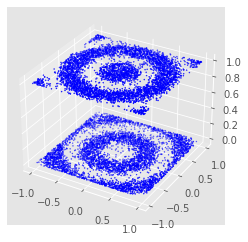

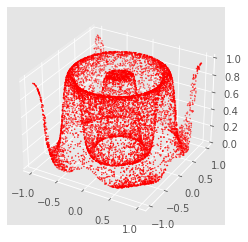

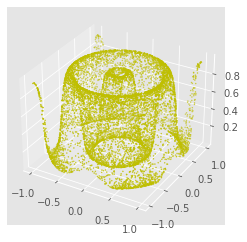

In [147]:
plt.style.use('ggplot')

# Plotting fir the original probabilities

N_plot = 10000
ax = plt.axes(projection='3d')
ax.scatter3D(X1[:N_plot],X2[:N_plot], Y[:N_plot], s=1,c='b')
plt.show()

# Now plotting the one predicted by our model

ax = plt.axes(projection='3d')
ax.scatter3D(X1[:N_plot],X2[:N_plot], g_hat(Xvec[:N_plot]).numpy(), s=1,c='r')
plt.show()

# Now plotting the probability p(x1,x2)

ax = plt.axes(projection='3d')
ax.scatter3D(X1[:N_plot],X2[:N_plot], sigmoid(3*np.sin(10*np.sqrt(X1[:N_plot]**2+X2[:N_plot]**2))), s=1,c='y')
plt.show()

Thus our network learns $p(x_1,x_2)$! (Can you think of why?). We can finally compute the error on $|\hat{p}-p|$:

In [148]:
err=np.sqrt(np.sum(np.abs(Y-g_hat(Xvec).numpy())**2))/np.sqrt(N)

print(f'the statistical error of the model is {err:.3f}')

the statistical error of the model is 0.353
